# 过拟合

## 正则化

一般地， 参数$\theta$的稀疏性约束通过约束参数$\theta$的L范数实现，即$$\Omega(\theta) = \sum_{\theta_i}\|\theta_i\|_l $$其中$\|\theta_i\|_l$表示参数$\theta_i$的$l$范数。

### L0正则化

L0 正则化是指采用 L0 范数作为稀疏性惩罚项$\Omega(\theta)$的正则化计算方式，即$$\Omega(\theta) = \sum_{\theta_i}\|\theta_i\|_0 $$其中L0范数$\|\theta_i\|_0$定义为$\theta_i$中非零元素的个数。  
由于L0范数$\|\theta_i\|_0$不可导，不能利用梯度下降算法进行优化，在神经网络中使用的并不多。

### L1正则化

采用 L1 范数作为稀疏性惩罚项$\Omega(\theta)$的正则化计算方式叫作 L1 正则化，即$$\Omega(\theta) = \sum_{\theta_i}\|\theta_i\|_1 $$其中L1范数$\|\theta_i\|_1$定义为张量$\theta_i$中所有元素的绝对值之和。  
L1 正则化也叫 Lasso Regularization，它是连续可导的，在神经网络中使用广泛。

In [1]:
import tensorflow as tf

# 创建网络参数 w1,w2
w1 = tf.random.normal([4,3])
w2 = tf.random.normal([4,2])
# 计算 L1 正则化项
loss_reg = tf.reduce_sum(tf.math.abs(w1)) + tf.reduce_sum(tf.math.abs(w2))
loss_reg

<tf.Tensor: id=18, shape=(), dtype=float32, numpy=16.066767>

### L2正则化

采用 L2 范数作为稀疏性惩罚项$\Omega(\theta)$的正则化计算方式叫作 L2 正则化，即$$\Omega(\theta) = \sum_{\theta_i}\|\theta_i\|_2 $$其中L2范数$\|\theta_i\|_2$定义为张量$\theta_i$中所有元素的平方和。 

In [2]:
# 创建网络参数 w1,w2
w1 = tf.random.normal([4,3])
w2 = tf.random.normal([4,2])
# 计算 L2 正则化项
loss_reg = tf.reduce_sum(tf.square(w1)) + tf.reduce_sum(tf.square(w2))
loss_reg

<tf.Tensor: id=37, shape=(), dtype=float32, numpy=17.855864>

## 数据增强

(512, 512, 3)


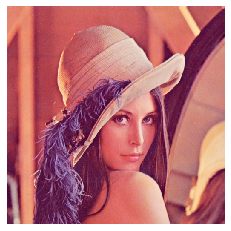

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from imageio import imread, imwrite
import os

img = imread('lena512color.tiff')
 
print(img.shape)
plt.imshow(img)
plt.axis('off')
# 转换格式成png，否则无法进行tensorflow图像处理
if not os.path.isfile("lena512color.png"):
    imwrite(im=img, format='png', uri='lena512color.png')

In [4]:
def preprocess(x):
    # 预处理函数
    # x: 图片的路径
    x = tf.io.read_file(x)
    x = tf.image.decode_jpeg(x, channels=3) # RGBA
    # 图片缩放到 244x244 大小，这个大小根据网络设定自行调整
    x = tf.image.resize(x, [244, 244])
    return x

(-0.5, 243.5, 243.5, -0.5)

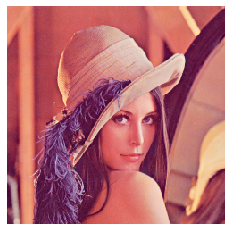

In [5]:
pic_lena = preprocess('lena512color.png')
plt.imshow(pic_lena / 255.)
plt.axis('off')

### 旋转

(-0.5, 243.5, 243.5, -0.5)

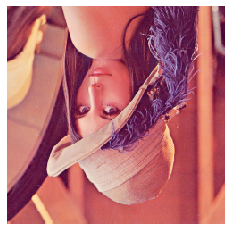

In [6]:
# 图片逆时针旋转 180 度
rot_x = tf.image.rot90(pic_lena, 2)
plt.imshow(rot_x / 255.)
plt.axis('off')

### 翻转

(-0.5, 243.5, 243.5, -0.5)

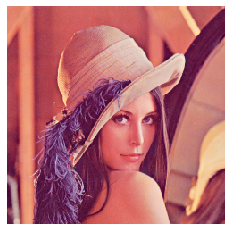

In [7]:
# 随机水平翻转
left_right_x = tf.image.random_flip_left_right(pic_lena)
plt.imshow(left_right_x / 255.)
plt.axis('off')

(-0.5, 243.5, 243.5, -0.5)

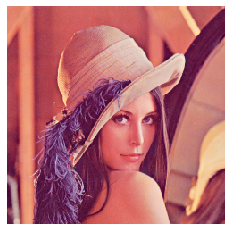

In [8]:
# 随机竖直翻转
up_down_x = tf.image.random_flip_up_down(pic_lena)
plt.imshow(up_down_x / 255.)
plt.axis('off')

### 裁剪

(-0.5, 223.5, 223.5, -0.5)

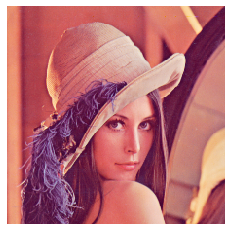

In [9]:
# 图片先缩放到稍大尺寸
x = tf.image.resize(pic_lena, [244, 244])
# 再随机裁剪到合适尺寸
x = tf.image.random_crop(x, [224,224,3])
plt.imshow(x / 255.)
plt.axis('off')